# TP2 Documentation : Régression Linéaire et Polynômiale avec MLE et MAP

Ce notebook se concentre sur l'implémentation et la comparaison de différentes méthodes de régression, notamment l'estimation du maximum de vraisemblance (MLE) et le maximum a posteriori (MAP), appliquées à un jeu de données. Voici un résumé des sections principales :

## 1. Configuration des Données et Visualisation
- Les données d'entrée (`X`) et les valeurs cibles (`y`) sont définies pour une tâche de régression simple.
- La fonction `plot_data` permet de visualiser ces points d'entraînement afin de mieux comprendre le jeu de données.

## 2. Estimation du Maximum de Vraisemblance (MLE)
- La méthode MLE est utilisée pour estimer les paramètres d'un modèle de régression linéaire.
- La fonction `estimat_MLE` calcule les paramètres en utilisant la solution sous forme fermée : `theta = (X^T X)^-1 X^T y`.
- Une fois estimés, les paramètres sont utilisés pour faire des prédictions via la fonction `prediction_MLE`.

## 3. Transformation des Caractéristiques Polynômiales
- Pour aller au-delà de la régression linéaire, des caractéristiques polynômiales sont générées avec la fonction `generate_polynomial_features`. Cela permet au modèle de capturer des relations non linéaires dans les données.

## 4. Comparaison des Modèles (MLE vs MAP)
- La performance des modèles est évaluée en utilisant la méthode MAP, qui étend MLE en intégrant une distribution a priori sur les paramètres.
- Différentes combinaisons d'hyperparamètres (α et σ) sont testées, et les performances sont mesurées en utilisant l'erreur quadratique moyenne (RMSE).
  
## Conclusion 
Le modèle MLE est efficace pour des tâches de régression simple. Toutefois, lorsque des relations plus complexes doivent être capturées (comme dans la régression polynômiale), l'ajustement des hyperparamètres dans le cadre MAP peut significativement améliorer les résultats. Le meilleur modèle est obtenu en ajustant soigneusement les paramètres α et σ pour minimiser l'erreur (RMSE).


    Question 1.1 et 1.2

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# Configuration des graphiques pour un meilleur rendu
plt.style.use('seaborn-v0_8-darkgrid')
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 16
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=MEDIUM_SIZE)
plt.rc('axes', labelsize=MEDIUM_SIZE)
plt.rc('xtick', labelsize=SMALL_SIZE)
plt.rc('ytick', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=BIGGER_SIZE)

# Définition de l'ensemble d'entraînement initial
X = np.array([-3, -1, 0, 1, 3]).reshape(-1, 1)
y = np.array([-1.2, -0.7, 0.14, 0.67, 1.67]).reshape(-1, 1)

# Visualisation des données
def plot_data(X, y, title="Données d'entraînement"):
    plt.figure(figsize=(10, 6))
    plt.plot(X, y, '+', markersize=10)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title(title)
    plt.grid(True)
    plt.show()

In [57]:


# 1.1 Estimateur du maximum de vraisemblance (MLE)
def estimat_MLE(X, y):
    """
    Calcule l'estimateur du maximum de vraisemblance pour la régression linéaire.
    X: données d'entrée (n_samples, n_features)
    y: valeurs cibles (n_samples, 1)
    """
    # Ajout d'une colonne de 1 pour le terme de biais
    X_bias = np.hstack([np.ones((X.shape[0], 1)), X])
    # Calcul de la solution MLE: theta = (X^T X)^-1 X^T y
    XTX = X_bias.T @ X_bias
    XTy = X_bias.T @ y
    theta = np.linalg.inv(XTX) @ XTy
    return theta

# 1.2 Prédiction avec l'estimateur MLE
def prediction_MLE(X_test, theta):
    """
    Prédit les valeurs de sortie pour X_test en utilisant les paramètres theta.
    X_test: données de test (n_samples, n_features)
    theta: paramètres du modèle
    """
    # Ajout d'une colonne de 1 pour le terme de biais
    X_test_bias = np.hstack([np.ones((X_test.shape[0], 1)), X_test])
    # Prédiction
    y_pred = X_test_bias @ theta
    return y_pred

# 1.3 Fonction pour générer la matrice des caractéristiques pour un polynôme de degré K
def generate_polynomial_features(X, K):
    """
    Génère la matrice des caractéristiques pour un polynôme de degré K.
    X: données d'entrée (n_samples, 1)
    K: degré du polynôme
    """
    n_samples = X.shape[0]
    # Création de la matrice des caractéristiques
    phi = np.ones((n_samples, K + 1))
    for k in range(1, K + 1):
        phi[:, k] = X[:, 0] ** k
    return phi

# 1.4 Estimation MLE avec la matrice des caractéristiques
def estimat_MLE_poly(phi, y):
    """
    Calcule l'estimateur MLE avec la matrice des caractéristiques phi.
    phi: matrice des caractéristiques (n_samples, n_features)
    y: valeurs cibles (n_samples, 1)
    """
    # Calcul de la solution MLE: theta = (phi^T phi)^-1 phi^T y
    phi_T_phi = phi.T @ phi
    phi_T_y = phi.T @ y
    theta = np.linalg.inv(phi_T_phi) @ phi_T_y
    return theta

# 1.5 Prédiction pour régression polynomiale
def prediction_poly(X_test, theta, K):
    """
    Prédit les valeurs pour X_test en utilisant un modèle polynomial de degré K.
    X_test: données de test (n_samples, 1)
    theta: paramètres du modèle
    K: degré du polynôme
    """
    # Génération des caractéristiques polynomiales pour X_test
    phi_test = generate_polynomial_features(X_test, K)
    # Prédiction
    y_pred = phi_test @ theta
    return y_pred

# 1.9 Calcul du RMSE (Root Mean Square Error)
def calculate_rmse(y_true, y_pred):
    """
    Calcule l'erreur quadratique moyenne entre y_true et y_pred.
    y_true: valeurs cibles réelles
    y_pred: valeurs prédites
    """
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

# 2.1 Estimation MAP (Maximum A Posteriori) avec régularisation
def estimat_MAP(phi, y, alpha, sigma):
    """
    Calcule l'estimateur MAP pour la régression linéaire avec régularisation.
    phi: matrice des caractéristiques
    y: valeurs cibles
    alpha: paramètre de régularisation (écart-type du prior)
    sigma: écart-type du bruit
    """
    n_features = phi.shape[1]
    # Matrice identité pour la régularisation
    I = np.eye(n_features)
    # Calcul de la solution MAP: theta = (phi^T phi + (sigma^2 / alpha^2) * I)^-1 phi^T y
    lambda_reg = (sigma**2) / (alpha**2)
    theta_map = np.linalg.inv(phi.T @ phi + lambda_reg * I) @ phi.T @ y
    return theta_map



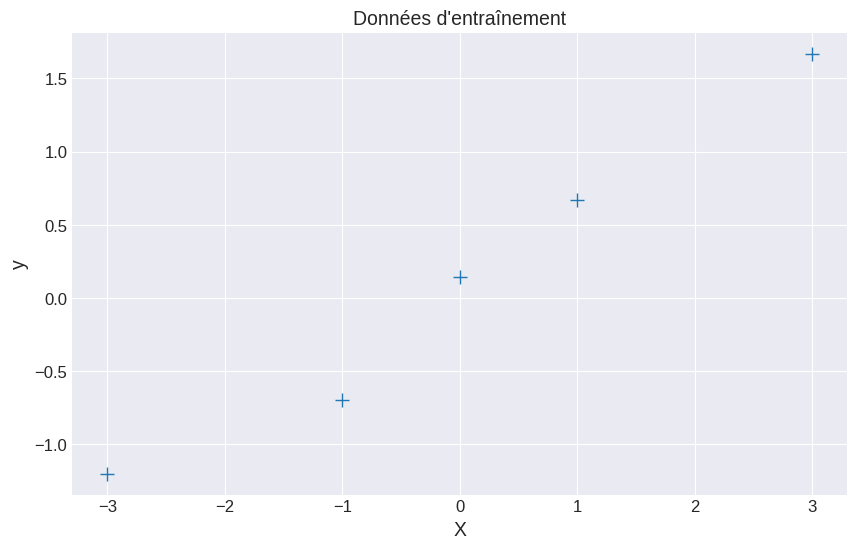

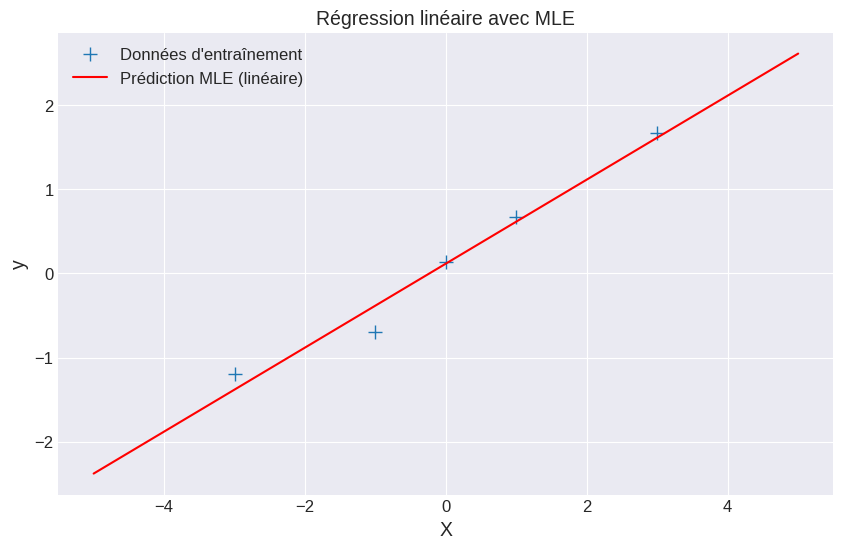

In [61]:
# Fonction principale pour le TP
# Visualisation des données initiales
plot_data(X, y)

# 1.1-1.2: MLE et prédiction pour le cas linéaire
theta_mle = estimat_MLE(X, y)
X_test = np.linspace(-5, 5, 100).reshape(-1, 1)
y_pred_mle = prediction_MLE(X_test, theta_mle)

# Visualisation de la régression linéaire
plt.figure(figsize=(10, 6))
plt.plot(X, y, '+', markersize=10, label="Données d'entraînement")
plt.plot(X_test, y_pred_mle, 'r-', label="Prédiction MLE (linéaire)")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Régression linéaire avec MLE")
plt.legend()
plt.grid(True)
plt.show()



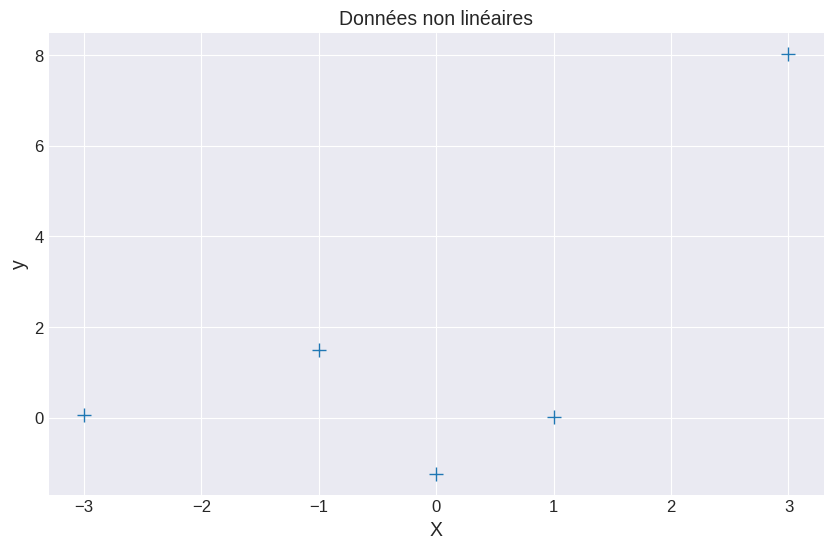

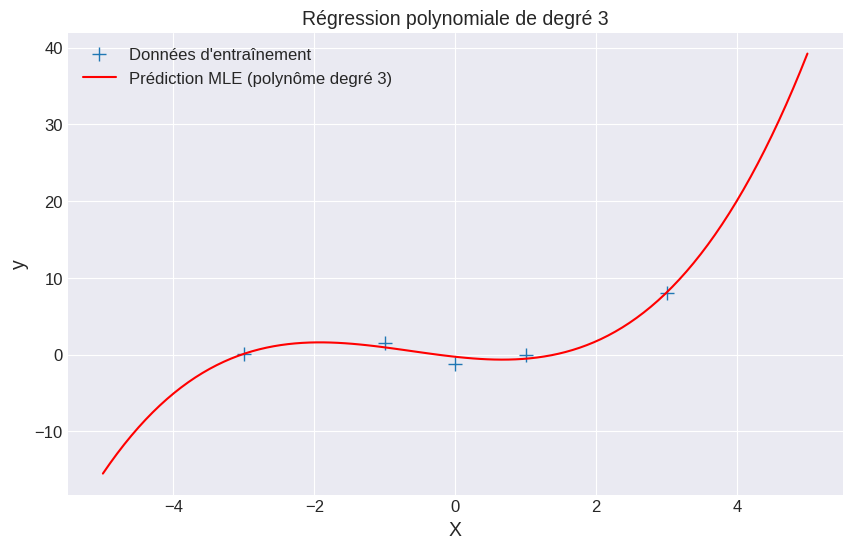

In [63]:

# Cas non linéaire avec le deuxième ensemble de données
y_nonlinear = np.array([0.05, 1.5, -1.234, 0.02, 8.03]).reshape(-1, 1)
plot_data(X, y_nonlinear, "Données non linéaires")
# 1.3-1.5: Régression polynomiale
K = 3  # Degré du polynôme
phi = generate_polynomial_features(X, K)
theta_poly = estimat_MLE_poly(phi, y_nonlinear)
y_pred_poly = prediction_poly(X_test, theta_poly, K)

# Visualisation de la régression polynomiale
plt.figure(figsize=(10, 6))
plt.plot(X, y_nonlinear, '+', markersize=10, label="Données d'entraînement")
plt.plot(X_test, y_pred_poly, 'r-', label=f"Prédiction MLE (polynôme degré {K})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Régression polynomiale de degré {K}")
plt.legend()
plt.grid(True)
plt.show()




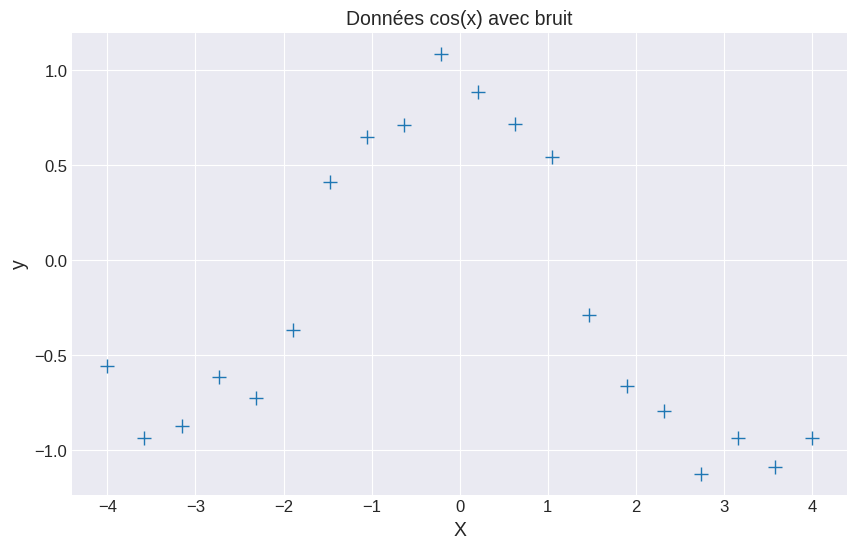

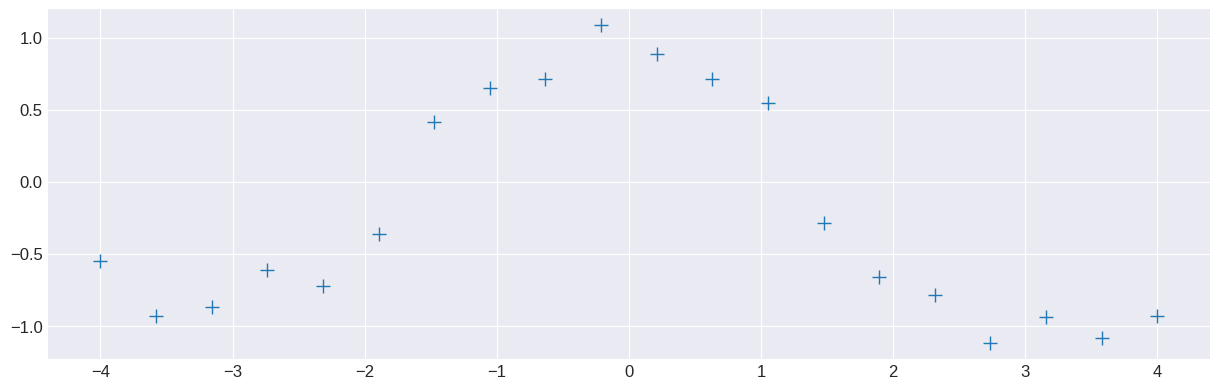

In [67]:
# 1.6: Nouveau jeu de données plus intéressant
def f(x):
    return np.cos(x) + 0.2 * np.random.normal(size=(x.shape))

np.random.seed(42)  # Pour reproductibilité
X_cos = np.linspace(-4, 4, 20).reshape(-1, 1)
y_cos = f(X_cos)
X_test_cos = np.linspace(-5, 5, 100).reshape(-1, 1)
y_test_cos = f(X_test_cos)

plot_data(X_cos, y_cos, "Données cos(x) avec bruit")


# 1.7-1.11: Tester différents degrés polynomiaux
max_degree = 15
rmse_train = np.zeros(max_degree)
rmse_test = np.zeros(max_degree)

plt.figure(figsize=(15, 10))
plt.subplot(2, 1, 1)
plt.plot(X_cos, y_cos, '+', markersize=10, label="Données d'entraînement")

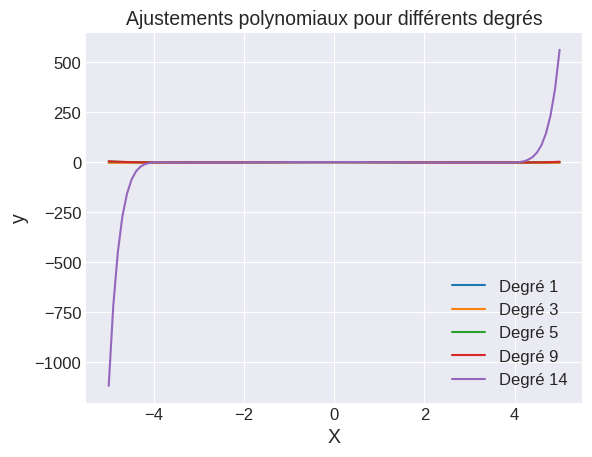

In [69]:
for k in range(1, max_degree + 1):
    # Génération des caractéristiques pour l'ensemble d'entraînement
    phi_train = generate_polynomial_features(X_cos, k)
    # Estimation des paramètres
    theta_k = estimat_MLE_poly(phi_train, y_cos)
    # Prédiction sur l'ensemble d'entraînement
    y_pred_train = phi_train @ theta_k
    # Prédiction sur l'ensemble de test
    y_pred_test = prediction_poly(X_test_cos, theta_k, k)
    
    # Calcul des RMSE
    rmse_train[k-1] = calculate_rmse(y_cos, y_pred_train)
    rmse_test[k-1] = calculate_rmse(y_test_cos, y_pred_test)
    
    # Tracer la courbe de prédiction pour certains degrés
    if k in [1, 3, 5, 9, 14]:
        plt.plot(X_test_cos, y_pred_test, '-', label=f"Degré {k}")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Ajustements polynomiaux pour différents degrés")
plt.legend()
plt.grid(True)



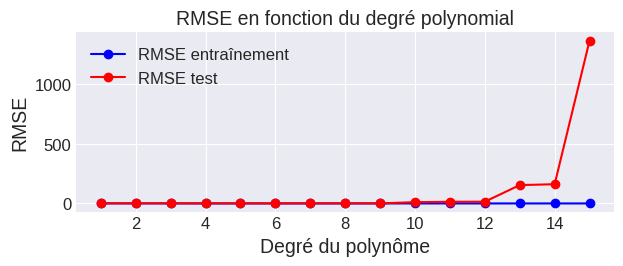

Meilleur degré selon RMSE test: 4


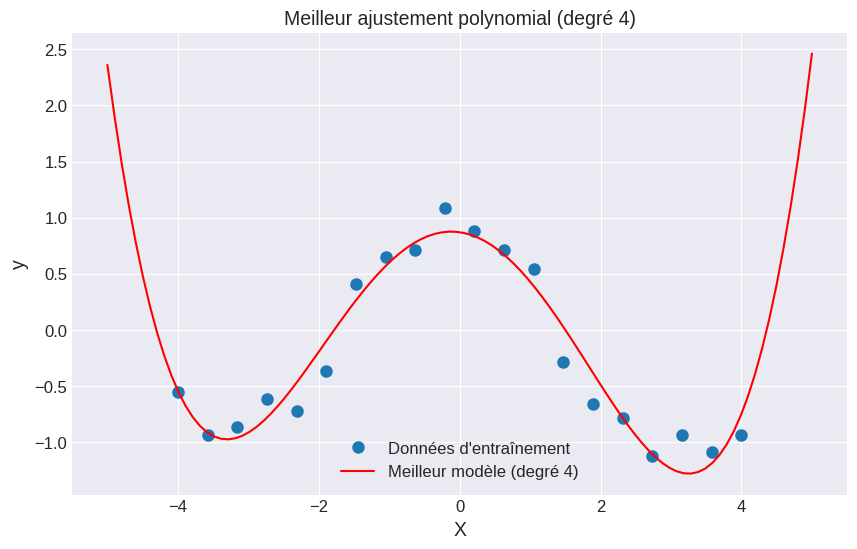

In [71]:
# Affichage des RMSE
plt.subplot(2, 1, 2)
degrees = np.arange(1, max_degree + 1)
plt.plot(degrees, rmse_train, 'b-o', label="RMSE entraînement")
plt.plot(degrees, rmse_test, 'r-o', label="RMSE test")
plt.xlabel("Degré du polynôme")
plt.ylabel("RMSE")
plt.title("RMSE en fonction du degré polynomial")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 1.12-1.13: Meilleur degré selon RMSE test
best_degree = np.argmin(rmse_test) + 1
print(f"Meilleur degré selon RMSE test: {best_degree}")

# Visualisation du meilleur modèle
phi_best = generate_polynomial_features(X_cos, best_degree)
theta_best = estimat_MLE_poly(phi_best, y_cos)
y_pred_best = prediction_poly(X_test_cos, theta_best, best_degree)

plt.figure(figsize=(10, 6))
plt.plot(X_cos, y_cos, 'o', markersize=8, label="Données d'entraînement")
plt.plot(X_test_cos, y_pred_best, 'r-', label=f"Meilleur modèle (degré {best_degree})")
plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Meilleur ajustement polynomial (degré {best_degree})")
plt.legend()
plt.grid(True)
plt.show()



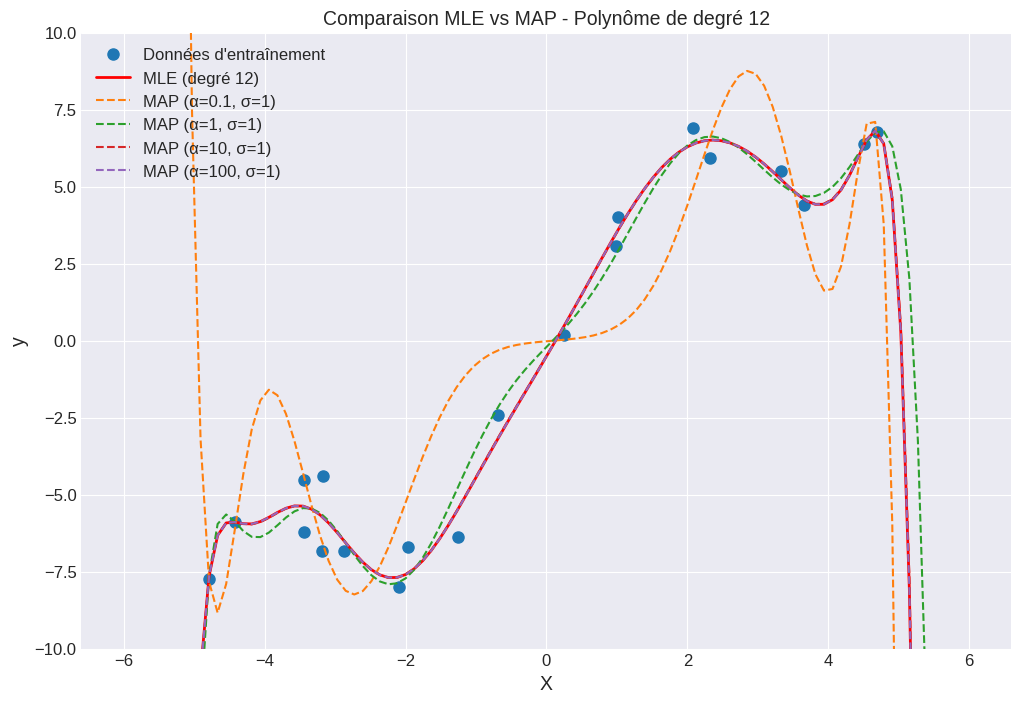

In [73]:
# 2.2-2.3: MAP vs MLE pour les données g(x)
def g(x, sigma):
    p = np.hstack([x*0, x*1, np.sin(x)])
    return p @ np.array([1, 2, 3]).reshape(-1, 1) + sigma * np.random.normal(size=(x.shape))

sigma = 1
alpha = 1
m = 20
np.random.seed(42)
X_g = (np.random.rand(m) * 10.0 - 5.0).reshape(-1, 1)
y_g = g(X_g, sigma)
X_test_g = np.linspace(-6, 6, 100).reshape(-1, 1)

# Test différents degrés polynomiaux avec MLE et MAP
K_high = 12  # Degré élevé pour montrer l'effet de la régularisation

# Génération des caractéristiques pour l'ensemble d'entraînement et de test
phi_train_g = generate_polynomial_features(X_g, K_high)
phi_test_g = generate_polynomial_features(X_test_g, K_high)

# Estimation MLE
theta_mle_g = estimat_MLE_poly(phi_train_g, y_g)
y_pred_mle_g = phi_test_g @ theta_mle_g

# Estimation MAP pour différentes valeurs d'alpha
alphas = [0.1, 1, 10, 100]

plt.figure(figsize=(12, 8))
plt.plot(X_g, y_g, 'o', markersize=8, label="Données d'entraînement")
plt.plot(X_test_g, y_pred_mle_g, 'r-', linewidth=2, label=f"MLE (degré {K_high})")

for alpha_val in alphas:
    # Estimation MAP
    theta_map_g = estimat_MAP(phi_train_g, y_g, alpha_val, sigma)
    y_pred_map_g = phi_test_g @ theta_map_g
    plt.plot(X_test_g, y_pred_map_g, '--', linewidth=1.5, 
             label=f"MAP (α={alpha_val}, σ={sigma})")

plt.xlabel("X")
plt.ylabel("y")
plt.title(f"Comparaison MLE vs MAP - Polynôme de degré {K_high}")
plt.legend()
plt.grid(True)
plt.ylim(-10, 10)  # Limiter l'axe y pour mieux visualiser
plt.show()



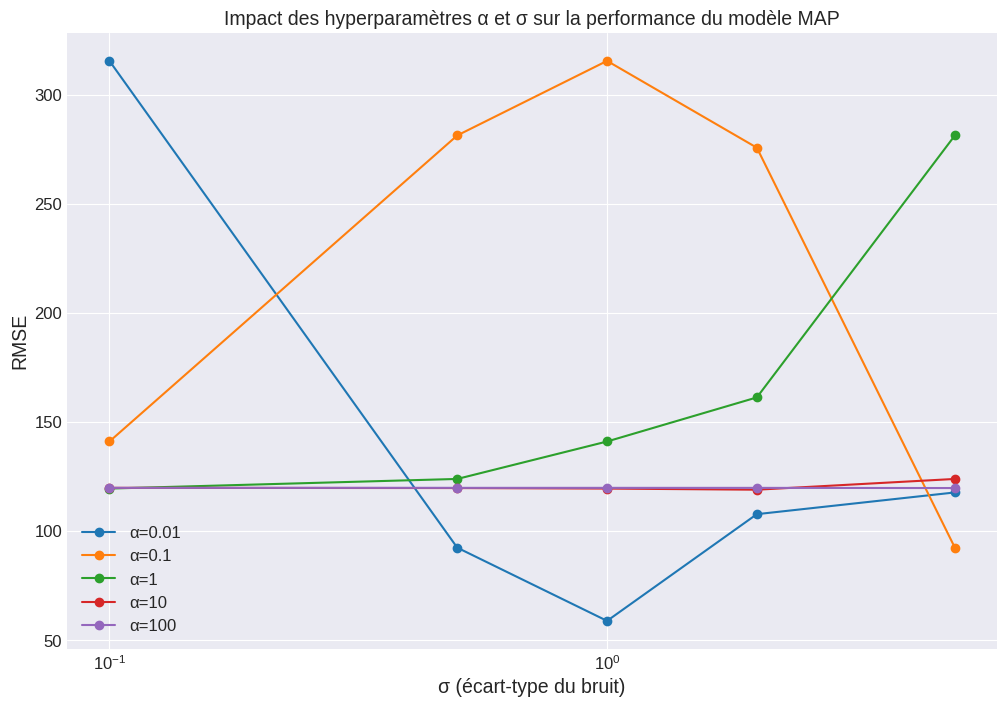

Meilleure combinaison: α=0.01, σ=1, RMSE=58.7969


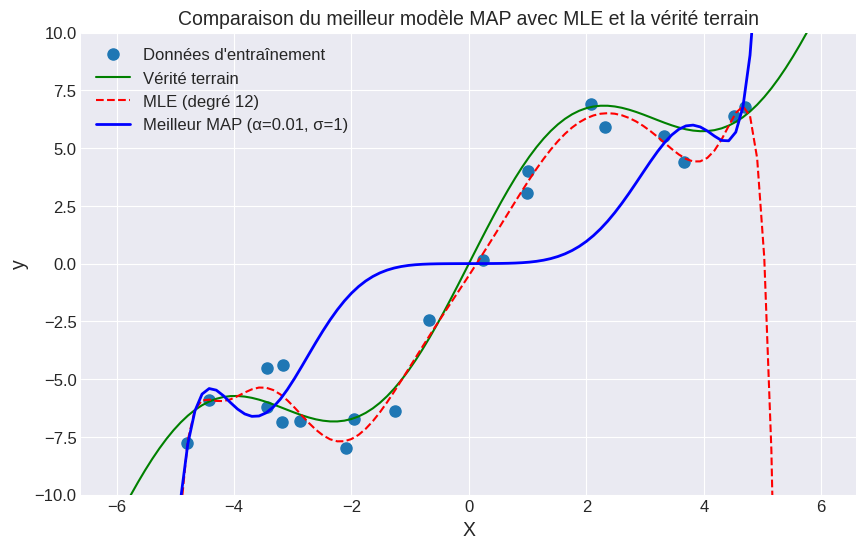

In [75]:
# 3. Analyse des hyperparamètres (α et σ)
# Grille de valeurs pour α et σ
alphas = [0.01, 0.1, 1, 10, 100]
sigmas = [0.1, 0.5, 1, 2, 5]

# Matrice pour stocker les RMSE
rmse_map = np.zeros((len(alphas), len(sigmas)))

# Vérité terrain (sans bruit)
def g_true(x):
    p = np.hstack([x*0, x*1, np.sin(x)])
    return p @ np.array([1, 2, 3]).reshape(-1, 1)

y_test_true = g_true(X_test_g)

# Calcul des RMSE pour différentes combinaisons de α et σ
for i, alpha_val in enumerate(alphas):
    for j, sigma_val in enumerate(sigmas):
        theta_map = estimat_MAP(phi_train_g, y_g, alpha_val, sigma_val)
        y_pred_map = phi_test_g @ theta_map
        rmse_map[i, j] = calculate_rmse(y_test_true, y_pred_map)

# Visualisation de l'effet des hyperparamètres
plt.figure(figsize=(12, 8))
for i, alpha_val in enumerate(alphas):
    plt.plot(sigmas, rmse_map[i, :], 'o-', label=f"α={alpha_val}")

plt.xlabel("σ (écart-type du bruit)")
plt.ylabel("RMSE")
plt.title("Impact des hyperparamètres α et σ sur la performance du modèle MAP")
plt.legend()
plt.grid(True)
plt.xscale('log')
plt.show()

# Visualisation de la meilleure combinaison
best_i, best_j = np.unravel_index(np.argmin(rmse_map), rmse_map.shape)
best_alpha = alphas[best_i]
best_sigma = sigmas[best_j]

print(f"Meilleure combinaison: α={best_alpha}, σ={best_sigma}, RMSE={rmse_map[best_i, best_j]:.4f}")

# Tracer le meilleur modèle MAP
theta_best_map = estimat_MAP(phi_train_g, y_g, best_alpha, best_sigma)
y_pred_best_map = phi_test_g @ theta_best_map

plt.figure(figsize=(10, 6))
plt.plot(X_g, y_g, 'o', markersize=8, label="Données d'entraînement")
plt.plot(X_test_g, y_test_true, 'g-', linewidth=1.5, label="Vérité terrain")
plt.plot(X_test_g, y_pred_mle_g, 'r--', linewidth=1.5, label=f"MLE (degré {K_high})")
plt.plot(X_test_g, y_pred_best_map, 'b-', linewidth=2, 
         label=f"Meilleur MAP (α={best_alpha}, σ={best_sigma})")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Comparaison du meilleur modèle MAP avec MLE et la vérité terrain")
plt.legend()
plt.grid(True)
plt.ylim(-10, 10)
plt.show()